<a href="https://colab.research.google.com/github/InbumS/DreamscomeTrue/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SIFT (Scale-Invariant Feature Transform):
 이미지의 크기와 회전에 불변하는 특징을 추출하는 알고리즘


Distinctive Image Features from Scale-Invariant Keypoints(2004)-DG Lowe

* SIFT를 통해 추출한 feature 들은 교합, 혼란 또는 잡음의 가능성을 줄인다.

* 데이터베이스와의 연동을 통해 정확한 일치, 개체 및 장면 인식의 기반을 제공

* 추출비용은 cascade filtering 접근으로 최소화

SIFT의 이미지 특성 추출 방법

1.**Scale-space extrema detection**: 이미지의 모든 스케일 지역 및 지역 탐색, Difference of Gaussian 함수를 통해 스케일 및 방향에 영향을 받지 않는 포인트(extrema detection)식별 -> noise 제거 감소

* DoG는 가우시안 컨벌루션된 영상에 대한 2차미분, LoG의 근사 -> 같은 octave내 서로 다른 두개의 gaussian blurred image 빼기


2.**Keypoint localization**: 각 후보 위치에서 자세한 모델이 위치와 규모를 결정하는데 적합, keypoint들은 그들의 안정성에 따라 선택 및 제거(by Taylor Series)

3**.Orientation assignment**: keypoint의 방향 결정,orientation(기하학에서의 물체적 방향)을 찾은 후 keypoint descriptor에서 빼줌 -> rotation-invariance 성질

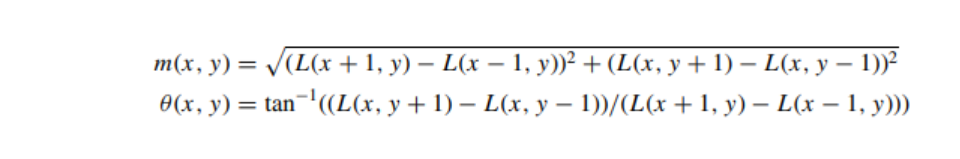

Gradient magnitude and Gradient Orientation을 구하는 식

이후 그레디언트 크기에 가우시안 가중함수를 곱하고 bin을 더한다.
* bin: 1bin have 10 degree, we create orientation histogram(36bins) in 16x16 patch

가장 높은  bin을 keypoint 방향으로 할당한다. 가장 높은 bin이 80%이상 값을 갖는 bin이 존재시 keypoint 새로 생성




4. **Keypoint descriptor**: 

하나의 Keypoint feature=[X,Y,Scale factor,Octave, Orientation]
 
and using Scale factor and octabve information, bring the gaussian blurred image which is applicable in Scale-space

keypoint X,Y좌표로 16X16 Patch 추출 -> patch를 16개의 divide 4X4 Patch

한개의 subpatch에는 8-bin histogram 생성(즉 8방향 정보 구성)

* result: 16X16 patch는 총 128의 값을 얻는다. 이것을 Keypoint descriptor로 정의, 후처리로 keypoint Orientation 값을 빼며 rotation-invariance 성질 부여 및 정규화 과정을 통한 밝기의존성 해결


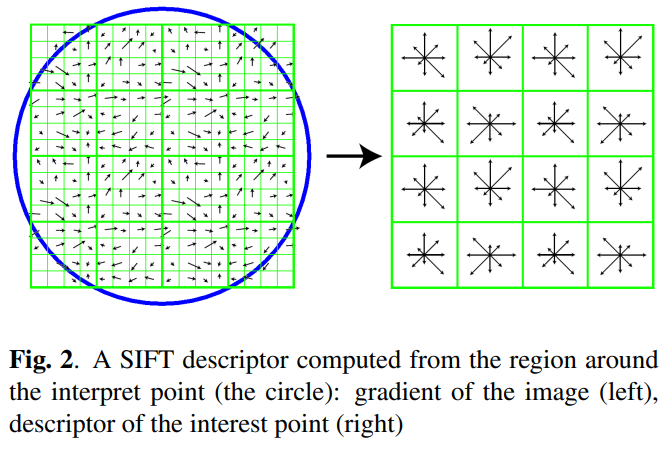
